In [1]:
#MADE BY ZHIYU SONG

In [2]:
# This is a project for researching the the correlation between the Positive ratio (Quality) of the game and the following factors
# 1. Number of Reviews
# 2. Some sample reviews
#    2.1 The positve reviews
#    2.2 The negative reviews
#    2.3 The Lengths of reviews
# 3. Price
# ETC

In [3]:
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("F:\Machine learning Steam\steam_reviews.csv")
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1.610788e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21747366,21747371,546560,Half-Life: Alyx,65645125,english,Holy balls,1584986704,1584986704,True,0,...,True,False,False,76561197967033932,431,7,432.0,0.0,29.0,1.586628e+09
21747367,21747372,546560,Half-Life: Alyx,65645115,english,"A tripod thing bears down on you, it looks imm...",1584986693,1584986693,True,0,...,False,False,False,76561198046495482,70,10,3296.0,15.0,24.0,1.611080e+09
21747368,21747373,546560,Half-Life: Alyx,65645100,english,Honestly this is the best vr game ever,1584986673,1584986673,True,0,...,True,False,False,76561198176379749,79,17,2654.0,0.0,34.0,1.591634e+09
21747369,21747374,546560,Half-Life: Alyx,65645066,english,Smooth turning is not working right now.\nIt a...,1584986631,1586382422,True,0,...,True,False,False,76561198041763187,140,3,210.0,0.0,12.0,1.589715e+09


In [5]:
df.columns

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [6]:
dfNames = pd.read_csv("F:\Machine learning Steam\games.csv")
print(type(dfNames))
dfNames

<class 'pandas.core.frame.DataFrame'>


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,10090,Call of Duty: World at War,2008-11-18,True,False,False,Very Positive,92,37039,19.99,19.99,0.0,True
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
3,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48839,223850,3DMark,2010-12-07,True,False,False,Very Positive,93,11573,34.99,34.99,0.0,False
48840,1268750,Starship Troopers: Extermination,2023-05-17,True,False,False,Very Positive,93,10330,24.99,24.99,0.0,True
48841,2005010,Warhammer 40000: Boltgun,2023-05-23,True,False,False,Overwhelmingly Positive,95,2660,19.79,21.99,10.0,True
48842,1304930,The Outlast Trials,2023-05-18,True,False,False,Very Positive,94,11155,29.99,29.99,0.0,True


In [7]:
dfMerge = pd.merge(dfNames, df, left_on='title', right_on='app_name', how='inner')
print(type(dfMerge))
dfMerge

<class 'pandas.core.frame.DataFrame'>


,app_id_x,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,413420,Danganronpa 2: Goodbye Despair,2016-04-18,True,True,True,Overwhelmingly Positive,96,20321,7.99,...,True,False,False,76561198811714169,3,1,3330.0,52.0,3300.0,1.611096e+09
1,413420,Danganronpa 2: Goodbye Despair,2016-04-18,True,True,True,Overwhelmingly Positive,96,20321,7.99,...,True,False,False,76561199122145259,12,2,1577.0,1526.0,1520.0,1.611091e+09
2,413420,Danganronpa 2: Goodbye Despair,2016-04-18,True,True,True,Overwhelmingly Positive,96,20321,7.99,...,True,False,False,76561198432776124,60,9,1877.0,1027.0,1877.0,1.611087e+09
3,413420,Danganronpa 2: Goodbye Despair,2016-04-18,True,True,True,Overwhelmingly Positive,96,20321,7.99,...,True,False,False,76561199090570956,4,3,930.0,372.0,930.0,1.611095e+09
4,413420,Danganronpa 2: Goodbye Despair,2016-04-18,True,True,True,Overwhelmingly Positive,96,20321,7.99,...,True,False,False,76561198451544515,8,3,1081.0,1081.0,900.0,1.611095e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675773,454200,Neon Hardcorps,2016-05-30,True,False,False,Mixed,43,71,1.99,...,True,False,False,76561198133195579,480,160,340.0,0.0,340.0,1.473808e+09
15675774,454200,Neon Hardcorps,2016-05-30,True,False,False,Mixed,43,71,1.99,...,False,False,False,76561198322447434,29,30,16.0,0.0,16.0,1.479653e+09
15675775,454200,Neon Hardcorps,2016-05-30,True,False,False,Mixed,43,71,1.99,...,True,False,False,76561198170759827,73,14,6.0,0.0,6.0,1.479060e+09
15675776,454200,Neon Hardcorps,2016-05-30,True,False,False,Mixed,43,71,1.99,...,False,False,False,76561198282752525,1096,100,220.0,0.0,220.0,1.478942e+09


In [8]:
#Filter out trash data
dfMerge.dropna(axis=1, how='all', inplace=True)

In [9]:
dfMerge

,app_id_x,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,413420,Danganronpa 2: Goodbye Despair,2016-04-18,True,True,True,Overwhelmingly Positive,96,20321,7.99,...,True,False,False,76561198811714169,3,1,3330.0,52.0,3300.0,1.611096e+09
1,413420,Danganronpa 2: Goodbye Despair,2016-04-18,True,True,True,Overwhelmingly Positive,96,20321,7.99,...,True,False,False,76561199122145259,12,2,1577.0,1526.0,1520.0,1.611091e+09
2,413420,Danganronpa 2: Goodbye Despair,2016-04-18,True,True,True,Overwhelmingly Positive,96,20321,7.99,...,True,False,False,76561198432776124,60,9,1877.0,1027.0,1877.0,1.611087e+09
3,413420,Danganronpa 2: Goodbye Despair,2016-04-18,True,True,True,Overwhelmingly Positive,96,20321,7.99,...,True,False,False,76561199090570956,4,3,930.0,372.0,930.0,1.611095e+09
4,413420,Danganronpa 2: Goodbye Despair,2016-04-18,True,True,True,Overwhelmingly Positive,96,20321,7.99,...,True,False,False,76561198451544515,8,3,1081.0,1081.0,900.0,1.611095e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675773,454200,Neon Hardcorps,2016-05-30,True,False,False,Mixed,43,71,1.99,...,True,False,False,76561198133195579,480,160,340.0,0.0,340.0,1.473808e+09
15675774,454200,Neon Hardcorps,2016-05-30,True,False,False,Mixed,43,71,1.99,...,False,False,False,76561198322447434,29,30,16.0,0.0,16.0,1.479653e+09
15675775,454200,Neon Hardcorps,2016-05-30,True,False,False,Mixed,43,71,1.99,...,True,False,False,76561198170759827,73,14,6.0,0.0,6.0,1.479060e+09
15675776,454200,Neon Hardcorps,2016-05-30,True,False,False,Mixed,43,71,1.99,...,False,False,False,76561198282752525,1096,100,220.0,0.0,220.0,1.478942e+09


In [10]:
# Drop unneccesary data
# 1. For easier computation
# 2. Remove useless data types
dfMerge.drop(['app_id_x', 'rating', 'date_release', 
              'win', 'mac', 'linux','review_id','timestamp_created', 
              'timestamp_updated','steam_purchase', 'received_for_free', 
              'written_during_early_access', 'author.steamid', 'author.num_games_owned', 
              'author.num_reviews', 'author.playtime_forever', 'author.playtime_last_two_weeks', 
              'author.playtime_at_review', 'author.last_played'], axis=1, inplace=True)
dfMerge

,title,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,Unnamed: 0,app_id_y,app_name,language,review,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count
0,Danganronpa 2: Goodbye Despair,96,20321,7.99,19.99,60.0,True,12706580,413420,Danganronpa 2: Goodbye Despair,english,Wouldn't say it's the best game... In all hone...,False,0,0,0.000000,0
1,Danganronpa 2: Goodbye Despair,96,20321,7.99,19.99,60.0,True,12706581,413420,Danganronpa 2: Goodbye Despair,english,stan ibuki for a wap,True,0,0,0.000000,0
2,Danganronpa 2: Goodbye Despair,96,20321,7.99,19.99,60.0,True,12706582,413420,Danganronpa 2: Goodbye Despair,brazilian,muito bo nota 10,True,1,1,0.525862,0
3,Danganronpa 2: Goodbye Despair,96,20321,7.99,19.99,60.0,True,12706583,413420,Danganronpa 2: Goodbye Despair,english,*chefs kiss*,True,0,0,0.000000,0
4,Danganronpa 2: Goodbye Despair,96,20321,7.99,19.99,60.0,True,12706584,413420,Danganronpa 2: Goodbye Despair,spanish,Obra de arte. Si buscas un juego con mucha his...,True,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675773,Neon Hardcorps,43,71,1.99,1.99,0.0,True,7245381,454200,Neon Hardcorps,russian,Спасибо за значок!,True,5,2,0.482718,0
15675774,Neon Hardcorps,43,71,1.99,1.99,0.0,True,7245382,454200,Neon Hardcorps,polish,good XD,True,0,0,0.423844,0
15675775,Neon Hardcorps,43,71,1.99,1.99,0.0,True,7245383,454200,Neon Hardcorps,english,dont dont dont ever buy this game.dont do this...,False,2,0,0.493742,0
15675776,Neon Hardcorps,43,71,1.99,1.99,0.0,True,7245384,454200,Neon Hardcorps,schinese,[h1] 大兄弟你为什么不好好做游戏！[/h1]\n没玩过这类垂直卷轴的游戏，但是我很喜欢这...,False,2,4,0.500446,0


In [11]:
# SAVE IT LOCALLY
#dfMerge.to_pickle("Cleaned database")

In [12]:
# LOAD the saved database
#dfMerge = pd.read_pickle("Cleaned database")

In [13]:
dfPattern = dfMerge.groupby('app_name')
dfGames = [dfPattern.get_group(x) for x in dfPattern.groups]
dfGames

[         title  positive_ratio  user_reviews  price_final  price_original  \
 15290578  20XX              92          3536         7.49           14.99   
 15290579  20XX              92          3536         7.49           14.99   
 15290580  20XX              92          3536         7.49           14.99   
 15290581  20XX              92          3536         7.49           14.99   
 15290582  20XX              92          3536         7.49           14.99   
 ...        ...             ...           ...          ...             ...   
 15294183  20XX              92          3536         7.49           14.99   
 15294184  20XX              92          3536         7.49           14.99   
 15294185  20XX              92          3536         7.49           14.99   
 15294186  20XX              92          3536         7.49           14.99   
 15294187  20XX              92          3536         7.49           14.99   
 
           discount  steam_deck  Unnamed: 0  app_id_y app_name

In [14]:
# Total of 248 games with reviews
len(dfGames)

248

In [15]:
#PCA, here we pick the most important 3 categories to find patterns
summaryDataDictionary = {}

for games in dfGames:
    name = games["title"].iloc[0]
    posRatio = games["positive_ratio"].iloc[0]
    totalReview = games["user_reviews"].iloc[0]
    price = games["price_final"].iloc[0]
    
    summaryDataDictionary[name] = [posRatio, totalReview, price]

summaryDataDictionary

{'20XX': [92, 3536, 7.49],
 'A Hat in Time': [98, 36782, 29.99],
 'A Short Hike': [99, 10534, 7.99],
 'A Way Out': [86, 27105, 29.99],
 'ARK: Survival Evolved': [83, 465818, 19.99],
 'ATLAS': [46, 35736, 29.99],
 'Age of Empires II (2013)': [95, 79211, 19.99],
 'Age of Empires: Definitive Edition': [84, 9979, 19.99],
 'American Truck Simulator': [96, 97492, 19.99],
 'Among Us': [92, 575982, 4.99],
 'Ancestors Legacy': [81, 4582, 34.99],
 'Arma 3': [90, 156107, 29.99],
 'Artifact': [46, 24797, 0.0],
 'Avorion': [90, 10236, 24.99],
 'Axiom Verge': [91, 4553, 19.99],
 'BATTLETECH': [83, 18722, 39.99],
 'BERSERK and the Band of the Hawk': [80, 2376, 59.99],
 'Baba Is You': [98, 14808, 14.99],
 'Banished': [89, 34370, 19.99],
 'Battle Royale Trainer': [56, 1577, 5.99],
 'BeamNG.drive': [97, 148132, 24.99],
 'Beat Saber': [96, 61441, 29.99],
 'BioShock Infinite': [93, 96711, 7.49],
 'Black Mesa': [95, 85772, 19.99],
 'Blackwake': [82, 20367, 4.99],
 'Bloons TD 6': [97, 209592, 13.99],
 'Bomb

posratio mean: 86.63709677419355
totalReview mean: 78310.14516129032
price mean: 22.86935483870955


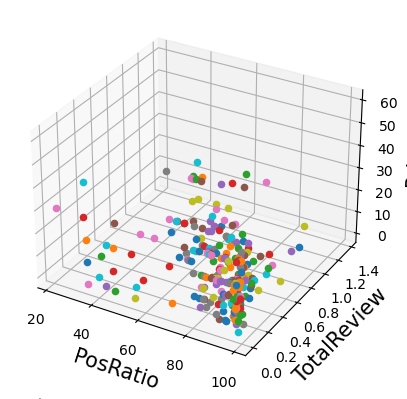

In [16]:
# Try to view the data
# X, TOTAL REVIEW Y positive ratio
# BUBBLE PLOT POSRATIO AND TOTAL REVIEW, PRICE size of bubble
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('PosRatio', fontsize=15)
ax.set_ylabel('TotalReview', fontsize=15)
ax.set_zlabel('Price', fontsize=15)

posRatio = []
totalReview = []
price = []
for value in summaryDataDictionary.values():
    posRatio.append(value[0])
    totalReview.append(value[1])
    price.append(value[2])
    
    ax.scatter(value[0], value[1], value[2])

print("posratio mean: " + str(sum(posRatio)/248))
print("totalReview mean: " + str(sum(totalReview)/248))
print("price mean: " + str(sum(price)/248))

<Axes: xlabel='numReview', ylabel='positiveRatio'>

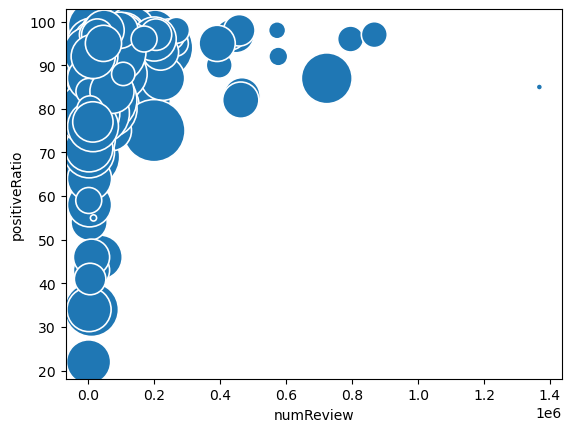

In [17]:
# BUBBLE PLOT
# RECOMMAND: UNSUPERVISED LEARNING (k-mean clustering)
# Check the separation of the data
# What are the factors that contribution to the popularity
# M

positiveRatio = pd.Series(posRatio)
numReview = pd.Series(totalReview)
priceOfGame = pd.Series(price)

dfRelation = pd.DataFrame({'positiveRatio': positiveRatio, 'numReview': numReview, 'priceOfGame': priceOfGame})

sns.scatterplot(data=dfRelation, x="numReview", y="positiveRatio", size="priceOfGame", legend=False, sizes=(20, 2000))

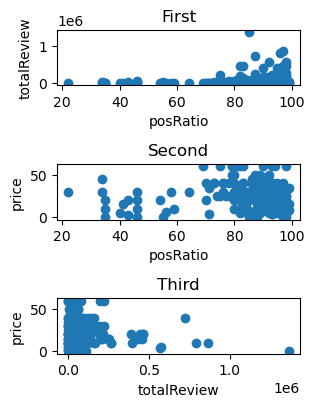

In [18]:
# 2D correlations
# First possibility: PosRatio with TotalReview
# Second possibility: PosRatio with Price
# Third possibility: TotalReview with Price

fig, ax = plt.subplots(3)

#First
ax[0].scatter(posRatio, totalReview)
ax[0].set(xlabel='posRatio', ylabel='totalReview', title='First')

#Second
ax[1].scatter(posRatio, price)
ax[1].set(xlabel='posRatio', ylabel='price', title='Second')

#Third
ax[2].scatter(totalReview, price)
ax[2].set(xlabel='totalReview', ylabel='price', title='Third')

plt.tight_layout(rect=[0, 0.03, 0.5, 0.9])

In [19]:
# From the data above we can spot some patterns within distribution of the data
# 1. Most data's price is lower than 25 Dollars
# 2. There can be seen a slight correlation regarding the positive ration and the total number of reviews that they 
#    are slightly positive related
# 3. Total review does not have a clear correlation with the positive ratio of the comments
# 4. There is no clear correlation between the number of reviews and the price

In [20]:
# REVIEW ANALYSIS
# Analyze reviews based on the length, is it recommended, and the language of the review that is in
# Current plan: Find the length of the reviews in each language, 
#               Get the average length and standard deviation of the data,
#               Check the length of each comment and compare it to the average length and standard deviation of each language
#               Check if it is a positive comment or negative comment to check if how positive it is
#               Score it accordingly

dfLanguage = dfMerge.groupby('language')
dfL = [dfLanguage.get_group(x) for x in dfLanguage.groups]
dfL

[                                   title  positive_ratio  user_reviews  \
 2         Danganronpa 2: Goodbye Despair              96         20321   
 28        Danganronpa 2: Goodbye Despair              96         20321   
 69        Danganronpa 2: Goodbye Despair              96         20321   
 74        Danganronpa 2: Goodbye Despair              96         20321   
 101       Danganronpa 2: Goodbye Despair              96         20321   
 ...                                  ...             ...           ...   
 15675640                  Neon Hardcorps              43            71   
 15675647                  Neon Hardcorps              43            71   
 15675714                  Neon Hardcorps              43            71   
 15675715                  Neon Hardcorps              43            71   
 15675753                  Neon Hardcorps              43            71   
 
           price_final  price_original  discount  steam_deck  Unnamed: 0  \
 2                7.99

In [21]:
# SELECT 100,000 Sample comments from each language to run and get score (If there is not enough comments, 
# we will only take what the database have)
# I tried to run it with all the variables but it ran for 12 hours without stopping so I would have to give up

# Get the length of 100,000 comments for each language
language = {}

for df in dfL:
    lang = df["language"].iloc[0]
    totalSampleComment = df["review"].tolist()
    totalSampleLen = len(totalSampleComment)
    sampleLength = np.array([])
    
    if totalSampleLen > 100000:
        totalSampleComment = totalSampleComment[0:100000]
        totalSampleLen = 100000
    
    for sample in totalSampleComment:
        if type(sample) != str:
            sample = str(sample)
        sampleLength = np.append(sampleLength, len(sample))      
        
    mean = np.mean(sampleLength)
    std = np.std(sampleLength)
    language[lang] = [mean, std]
language

{'brazilian': [154.31798, 388.49244462243996],
 'bulgarian': [70.64582811325482, 245.5285728784614],
 'czech': [153.0040239837439, 431.38309654650334],
 'danish': [70.37572400478074, 202.87484049653105],
 'dutch': [91.03072554454099, 224.8682502569591],
 'english': [268.13289, 583.4661301654518],
 'finnish': [76.26167483781508, 244.88102418531633],
 'french': [185.64716, 478.5935774160936],
 'german': [218.43953, 543.6632082671947],
 'greek': [95.02054076713478, 268.53953930939394],
 'hungarian': [121.70553005824364, 341.6788042162624],
 'italian': [292.8440282937255, 637.6108540707085],
 'japanese': [222.65932796408768, 405.7376393864842],
 'koreana': [66.61112, 202.78664944306766],
 'latam': [217.23251162382664, 504.0987010054667],
 'norwegian': [70.82074416254646, 207.83061092266544],
 'polish': [104.09993, 334.8880273225591],
 'portuguese': [91.62464581566172, 256.1785576487084],
 'romanian': [51.978265959107226, 191.58778567465683],
 'russian': [183.88375, 503.7249488718396],
 'sc

In [22]:
# Add in language number
# BEFORE STARTING, 
# Assumption 1: The longer the comment, the more valid the comment is in either the positive or negative direction
# Assumption 2: Different languages have different length due to the nature of the language and we will score it all accordingly
# Assumption 3: Only the quality of comments matter here, because total number of reviews is already counted that factor in
# 
# MATH
# ScoreComment = |(length of comment - Average Comment Length)|/(Standard Deviation of Length) [According to its language]
# ScoreGame = Sum of ScoreComment / Number of samples

scoreComment = []

for game in dfGames:
    commentLanguage = game['language'].tolist()
    gameReview = game['review'].tolist()
    checkRecommanded = game['recommended'].tolist()
    
    score = 0
    
    for (i, review) in zip(range(0, len(commentLanguage)), gameReview):
        if type(review) != str:
            review = str(review)
            
        scoreGame = (len(review) - language[commentLanguage[i]][0] )/language[commentLanguage[i]][1]
        
        if (scoreGame > 0 and checkRecommanded[i] == False) or (scoreGame < 0 and checkRecommanded[i] == True):
            scoreGame = scoreGame*-1
        
        score= score + scoreGame
    
    score = score/len(commentLanguage)
    
    scoreComment.append(score)
    
scoreComment    

[0.6063830448841895,
 0.4885861710898799,
 0.415663211031945,
 0.3139313837329205,
 0.22300125439833288,
 -0.03316293261572316,
 0.33377437208755684,
 0.2455640907457522,
 0.3795220562902183,
 0.33628250175574187,
 0.37405949155482693,
 0.44215266189079727,
 0.02688992820619233,
 0.5429886744134296,
 0.6160018079564179,
 0.4073303391296217,
 0.47033774497320685,
 0.3636334245411368,
 0.3882845244014302,
 0.1539941600000036,
 0.3485358059137614,
 0.350864679135165,
 0.4523555815676383,
 0.4488766634488947,
 0.2945940564228922,
 0.3604445692271908,
 0.4404968345350903,
 0.26225786739678364,
 0.36395354255104984,
 0.27231092582429034,
 0.4226234750638729,
 0.4582055325132002,
 0.3430777480305573,
 0.142801728933167,
 0.46662295550673905,
 0.2770131177788093,
 0.33358646845116724,
 0.41856328586640784,
 0.3548899139046076,
 -0.2261095292833614,
 0.3803868281272945,
 0.41015636134828437,
 0.38701464261112095,
 0.3631139318460699,
 0.4312369070788817,
 0.37252430421613875,
 0.349191823350171

In [23]:
import operator
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Polynomial regression is used after looking over the data provided
# 3 Models were built to try to predict and the results is the following
# BREAK THE DATA INTO SMALL PIECES on the posratio

[Text(0.5, 0, 'totalReview'),
 Text(0, 0.5, 'posRatio'),
 Text(0.5, 1.0, 'Relationship between posRatio and totalReview')]

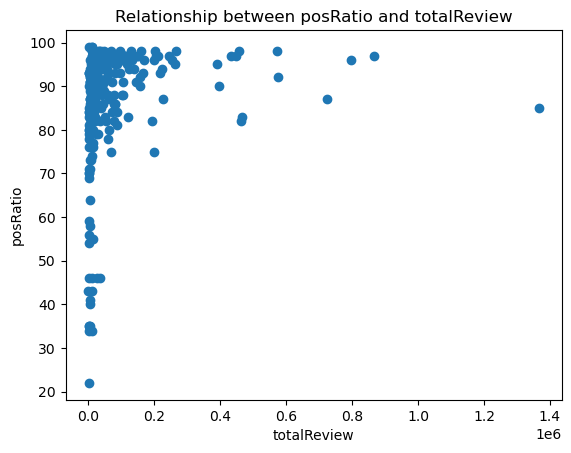

In [24]:
# FOR positive ratio and total number of reviews
# Null Hypothesis: There is a relationship between the total number of reviews and the number of Positive reviews
# Alternative Hypothesis: There are no relationships between the total number of reviews and the number of Positive reviews

fig2, ax2 = plt.subplots()

ax2.scatter(totalReview, posRatio)
ax2.set(xlabel='totalReview', ylabel='posRatio', title='Relationship between posRatio and totalReview')

In [25]:
# The following code is from 11_OSL.ipynb from canvas
def train_n_plot(polynomial_features, x, y):
    x_poly = polynomial_features.fit_transform(x)

    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    evalModel(y, y_poly_pred)

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.scatter(x, y, s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
    x2plot, y_poly_pred = zip(*sorted_zip)
    plt.plot(x2plot, y_poly_pred, color='m')
    plt.show()

In [26]:
def evalModel(actual, prediction):
    print('MAE:', metrics.mean_absolute_error(actual, prediction))
    print('MSE:', metrics.mean_squared_error(actual, prediction))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(actual, prediction)))
    print('R2:', metrics.r2_score(actual, prediction))

[92, 98, 99, 86, 83, 46, 95, 84, 96, 92, 81, 90, 46, 90, 91, 83, 80, 98, 89, 56, 97, 96, 93, 95, 82, 97, 89, 84, 97, 81, 92, 97, 93, 54, 86, 78, 96, 93, 92, 43, 96, 87, 94, 89, 95, 91, 90, 69, 97, 34, 96, 96, 91, 76, 84, 97, 58, 82, 97, 95, 35, 91, 97, 99, 96, 96, 35, 97, 84, 92, 95, 82, 96, 97, 86, 94, 89, 88, 82, 95, 96, 85, 82, 70, 93, 94, 97, 78, 88, 86, 74, 91, 81, 96, 96, 83, 91, 89, 85, 98, 93, 97, 98, 96, 97, 98, 92, 97, 88, 97, 97, 93, 94, 46, 83, 87, 22, 86, 94, 86, 97, 97, 95, 82, 91, 94, 64, 81, 87, 87, 93, 97, 90, 92, 43, 83, 86, 94, 79, 75, 88, 96, 98, 98, 96, 96, 90, 96, 90, 94, 98, 97, 97, 97, 87, 73, 91, 85, 98, 93, 82, 97, 97, 94, 98, 76, 87, 75, 94, 80, 82, 97, 96, 95, 89, 97, 70, 99, 84, 95, 79, 97, 97, 90, 90, 97, 98, 80, 55, 73, 88, 96, 83, 96, 97, 94, 85, 80, 96, 40, 97, 95, 97, 94, 93, 95, 98, 93, 97, 97, 97, 71, 97, 97, 85, 87, 83, 96, 80, 96, 71, 82, 79, 93, 98, 88, 79, 96, 92, 92, 98, 35, 96, 34, 97, 76, 87, 84, 98, 84, 80, 46, 41, 59, 92, 95, 77, 88]
MAE: 9.

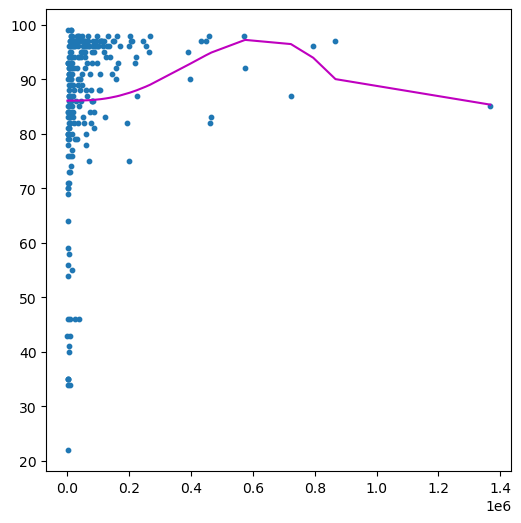

In [27]:
print(posRatio)
totalReview = np.array(totalReview)
posRatio = np.array(posRatio)
totalReview2 = totalReview[:, np.newaxis]
posRatio2 = posRatio[:, np.newaxis]

train_n_plot(PolynomialFeatures(degree=5), totalReview2, posRatio2)

In [28]:
# Although there is a correlation shown by the gragh, because only around 4 Percent of the data is predictable (R2), 
# we cannot prove there are no relationships between the number of total reviews and the number of Positive reviews
# Overall, the model did not fit to the data well due to the weirdly structed data


[Text(0.5, 0, 'totalReview'),
 Text(0, 0.5, 'price'),
 Text(0.5, 1.0, 'Relationship between price and totalReview')]

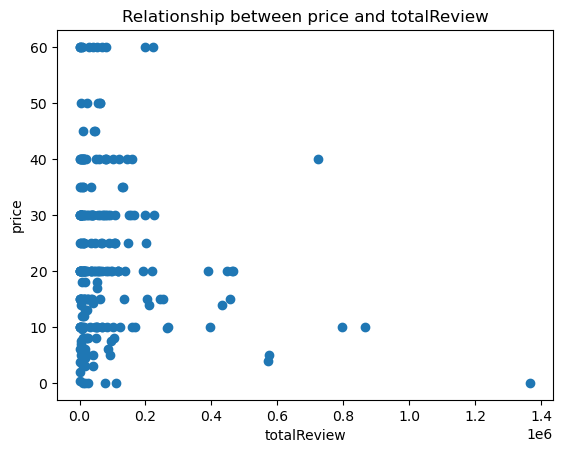

In [29]:
# FOR total number of reviewsamd price
# Null Hypothesis: There is a relationship between the number of total reviews and the price of the game
# Alternative Hypothesis: There are no relationships between the number of total reviews and the price of the game

fig3, ax3 = plt.subplots()

ax3.scatter(totalReview, price)

ax3.set(xlabel='totalReview', ylabel='price', title='Relationship between price and totalReview')

MAE: 11.263758846253157
MSE: 200.7205925806989
RMSE: 14.167589512005877
R2: 0.02187785064322756


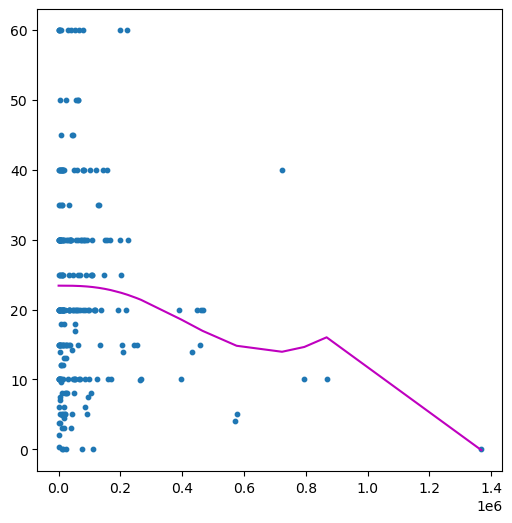

In [30]:
# DISTRIBUTION OF PRICE
priceRatio = np.array(price)
priceRatio2 = priceRatio[:, np.newaxis]

train_n_plot(PolynomialFeatures(degree=5), totalReview2, priceRatio2)

In [31]:
# Because the model only has R2 of around 2 percent, 
# we can conclude that there are no relationships between the number of total reviews and the price of the game
# Overall, the model did not fit the data well due to the unique structure it had


[Text(0.5, 0, 'price'),
 Text(0, 0.5, 'posRatio'),
 Text(0.5, 1.0, 'Relationship between posRatio and price')]

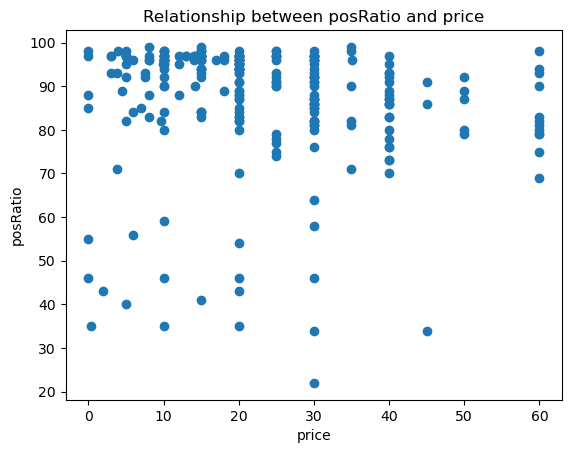

In [32]:
# FOR the number of Positive reviews and price
# Null Hypothesis: There is a relationship between the number of Positive reviews and the price of the game
# Alternative Hypothesis: There are no relationships between the number of Positive reviews and the price of the game

fig4, ax4 = plt.subplots()

ax4.scatter(price, posRatio)
ax4.set(xlabel='price', ylabel='posRatio', title='Relationship between posRatio and price')

MAE: 9.496763061551583
MSE: 200.20213873825818
RMSE: 14.149280502494047
R2: 0.05221324076471234


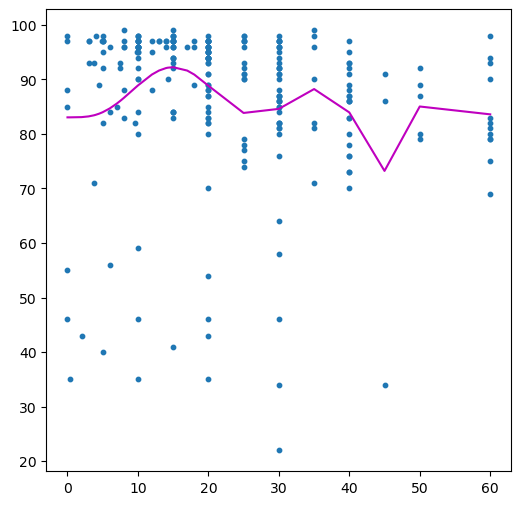

In [33]:
train_n_plot(PolynomialFeatures(degree=10), priceRatio2, posRatio2)

In [34]:
# Because the model only has R2 of around 19 percent, 
# there is a weak relationship between the number of positive reviews and the price of it
# Overall, although the model performed considerably better than the last two cases, it is still weak 
# and unable to derive to a conclusion

In [35]:
# Because previous method did not see much achievement, add in the new variable and check

In [36]:
# INTRODUCE NEW VARIABLE
# First Form a new dataframe consisting of the four columns here for each game
# The columns are the following: 
# 1. Total Comments
# 2. Price
# 3. "Assumed rating" (or Score comments)
# 4. Actual Rating

gameTitle = dfMerge["title"].unique()
scoreComment = np.array(scoreComment)

newData = {
    'Title': gameTitle,
    'Total Comments': totalReview,
    'Price': priceRatio,
    'Score from comment': scoreComment,
    'Positive Ratio': posRatio
    
}

dfNew = pd.DataFrame(newData)
dfNew.set_index('Title', inplace=True)
dfNew

,Total Comments,Price,Score from comment,Positive Ratio
Title,,,,
Danganronpa 2: Goodbye Despair,3536,7.49,0.606383,92
Saints Row: The Third,36782,29.99,0.488586,98
Black Mesa,10534,7.99,0.415663,99
Heroes of Hammerwatch,27105,29.99,0.313931,86
Total War: THREE KINGDOMS,465818,19.99,0.223001,83
...,...,...,...,...
Freeman: Guerrilla Warfare,982,9.99,0.043138,59
Urban Empire,14451,29.99,0.357248,92
DYNASTY WARRIORS 9,45578,19.99,0.490085,95


In [37]:
# GOAL: Find the relationship between the Positive Ratio and the other characteristics
# Plan: Find the common characteristics of good games, and bad games using K-Mean clustering

# Load libraries
# CODE FROM 15_kMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scaler = StandardScaler()

df_scaled = scaler.fit_transform(dfNew)


# Get details
pd.DataFrame(df_scaled).describe()

,0,1,2,3
count,2.480000e+02,2.480000e+02,2.480000e+02,2.480000e+02
mean,3.581365e-17,-1.325105e-16,1.522080e-16,-2.148819e-16
std,1.002022e+00,1.002022e+00,1.002022e+00,1.002022e+00
min,-5.196421e-01,-1.596447e+00,-3.983696e+00,-4.447365e+00
25%,-4.638716e-01,-8.990725e-01,-2.444666e-01,-2.502510e-01
50%,-3.440019e-01,-2.009999e-01,8.076116e-02,3.689954e-01
75%,1.936628e-02,4.970727e-01,5.302737e-01,6.442160e-01
max,8.564669e+00,2.591290e+00,2.289405e+00,8.506314e-01


F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

0.5894764766976336 2


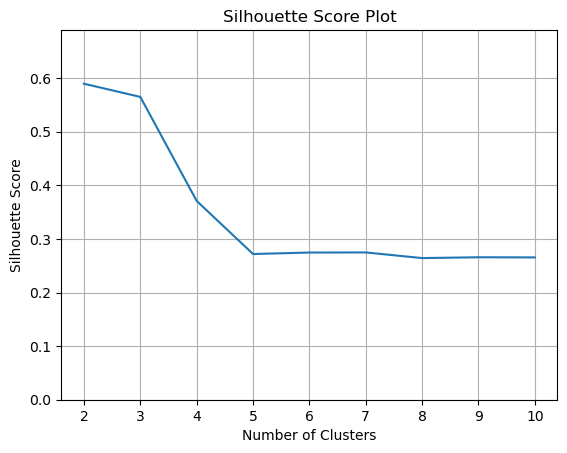

In [38]:
min_cluster = 2
max_cluster = 10

bestScore = 0
bestCluster = 0

silhouetteScore = []

for i in range(min_cluster, max_cluster+1):
    cluster = KMeans(n_clusters=i, random_state=0, n_init="auto")
    
    # Train model
    model = cluster.fit(df_scaled)
    
    model.score(df_scaled)
    
    currentScore = silhouette_score(df_scaled, model.labels_)
    
    silhouetteScore.append(currentScore)
    
    if currentScore > bestScore:
        bestScore = currentScore
        bestCluster = i

print(bestScore, bestCluster)        
        
plt.plot(range(min_cluster, max_cluster+1), silhouetteScore)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Plot')

plt.ylim(0, max(silhouetteScore) + 0.1)
plt.grid()
plt.show()

In [39]:
# Create k-mean object
cluster = KMeans(n_clusters=bestCluster, random_state=0, n_init="auto")

# Train model
model = cluster.fit(df_scaled)

model.score(df_scaled)

F:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


-647.1058864681081

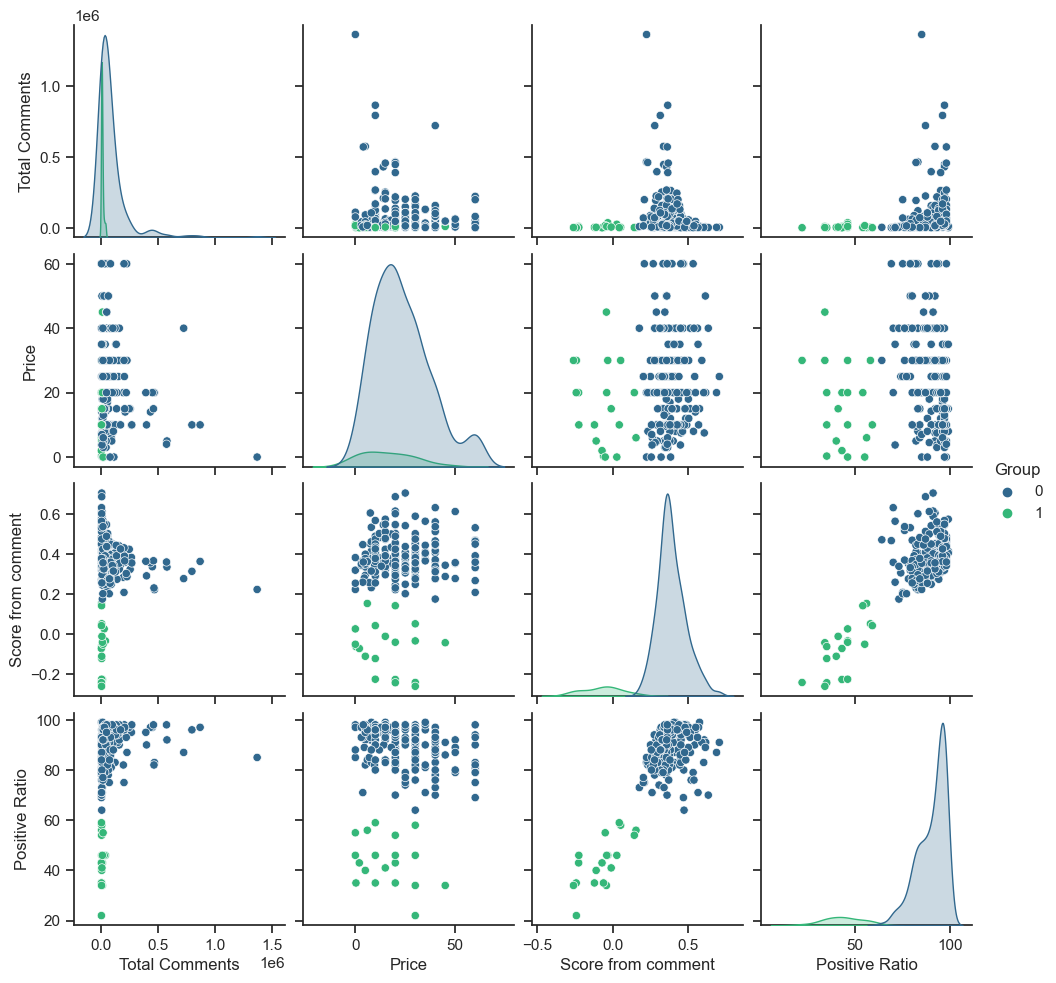

In [40]:
labels = model.labels_

dfCluster = dfNew.copy()
dfCluster['Group'] = labels

sns.set(style="ticks")
sns.pairplot(dfCluster, hue='Group', palette='viridis')
plt.show()

In [41]:
# FROM THE GRAPHS SHOWED IN THIS PLACE, We can see that positive ratio is mostly correlated to Score from comments
# considerably correlated to the amount of total Comments, and least correlated to price
# After visualization and proof we continue to prove it with numbers

In [42]:
# NEXT STEP
# We use Random Forest classification algorithm to find the relationship between them
# Code below is from 14_Random_Forest with slight modification

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [73]:
X = dfCluster[["Total Comments", "Price","Score from comment"]]
y = dfCluster['Positive Ratio']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
rf_model = RandomForestClassifier(n_estimators=10) # n = number of the decision trees in forest

In [88]:
_ = rf_model.fit(X_train, y_train)

rf_yhat = rf_model.predict(X_test)

In [89]:
accuracy_score(rf_yhat, y_test)

0.1

In [48]:
# DUE TO THE accuracy score being low, we change to another method

In [49]:
# Since we can see a relation in the graphs above, we partition it into segments to find relations
# Method 3 (Recommanded by Ajarn Pear):
# Show the findings by partitioning the graphs into different segments and then finding the relationship
# Partition by Group for positive ratio ranges from:
# 1. Less than 40 # Not partition equally because there is no value smaller than 20
# 2. 40 <= x < 60
# 3. 60 <= x < 80
# 4. Equal to or more than 80

bins = [0, 40, 60, 80, 100]
label = ['Very low', 'Low', 'Okay', 'High']

dfSeg = dfNew.copy()
dfSeg['Score Ranks'] = pd.cut(dfSeg['Positive Ratio'], bins = bins, labels = label)

dfSeg

,Total Comments,Price,Score from comment,Positive Ratio,Score Ranks
Title,,,,,
Danganronpa 2: Goodbye Despair,3536,7.49,0.606383,92,High
Saints Row: The Third,36782,29.99,0.488586,98,High
Black Mesa,10534,7.99,0.415663,99,High
Heroes of Hammerwatch,27105,29.99,0.313931,86,High
Total War: THREE KINGDOMS,465818,19.99,0.223001,83,High
...,...,...,...,...,...
Freeman: Guerrilla Warfare,982,9.99,0.043138,59,Low
Urban Empire,14451,29.99,0.357248,92,High
DYNASTY WARRIORS 9,45578,19.99,0.490085,95,High


In [50]:
dfRate = dfSeg.groupby('Score Ranks')
dfR = [dfRate.get_group(x) for x in dfRate.groups]
dfR

[                                  Total Comments  Price  Score from comment  \
 Title                                                                         
 American Truck Simulator                    9363  44.99           -0.042250   
 PixARK                                      3278   9.99           -0.121469   
 Farm Together                               1623   0.30           -0.061548   
 SOULCALIBUR VI                               560  29.99           -0.241121   
 SENRAN KAGURA Peach Beach Splash            3450   4.99           -0.110143   
 Ori and the Will of the Wisps                972  19.99           -0.242220   
 Foundation                                  1887  29.99           -0.260316   
 
                                   Positive Ratio Score Ranks  
 Title                                                         
 American Truck Simulator                      34    Very low  
 PixARK                                        35    Very low  
 Farm Together        

In [51]:
meandf = [dfM.mean() for dfM in dfR]
meandf

C:\Users\Jeffe\AppData\Local\Temp\ipykernel_19448\3081185665.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  meandf = [dfM.mean() for dfM in dfR]
C:\Users\Jeffe\AppData\Local\Temp\ipykernel_19448\3081185665.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  meandf = [dfM.mean() for dfM in dfR]
C:\Users\Jeffe\AppData\Local\Temp\ipykernel_19448\3081185665.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=No

[Total Comments        3019.000000
 Price                   20.034286
 Score from comment      -0.154153
 Positive Ratio          33.571429
 dtype: float64,
 Total Comments        9198.333333
 Price                   13.575000
 Score from comment      -0.019717
 Positive Ratio          49.416667
 dtype: float64,
 Total Comments        20590.629630
 Price                    36.425185
 Score from comment        0.363701
 Positive Ratio           75.629630
 dtype: float64,
 Total Comments        92739.881188
 Price                    21.707822
 Score from comment        0.391803
 Positive Ratio           92.158416
 dtype: float64]

In [52]:
type(meandf[0])

pandas.core.series.Series

In [58]:
dfMean = pd.DataFrame()

for (i, ds) in zip(range(0, len(label)), meandf):
    ds.name = label[i]
    dfMean = dfMean.append(ds)

dfMean

C:\Users\Jeffe\AppData\Local\Temp\ipykernel_19448\4120230718.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfMean = dfMean.append(ds)
C:\Users\Jeffe\AppData\Local\Temp\ipykernel_19448\4120230718.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfMean = dfMean.append(ds)
C:\Users\Jeffe\AppData\Local\Temp\ipykernel_19448\4120230718.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfMean = dfMean.append(ds)
C:\Users\Jeffe\AppData\Local\Temp\ipykernel_19448\4120230718.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfMean = dfMean.append(ds)


,Total Comments,Price,Score from comment,Positive Ratio
Very low,3019.000000,20.034286,-0.154153,33.571429
Low,9198.333333,13.575000,-0.019717,49.416667
Okay,20590.629630,36.425185,0.363701,75.629630
High,92739.881188,21.707822,0.391803,92.158416


F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
F:\Anaconda\lib\site

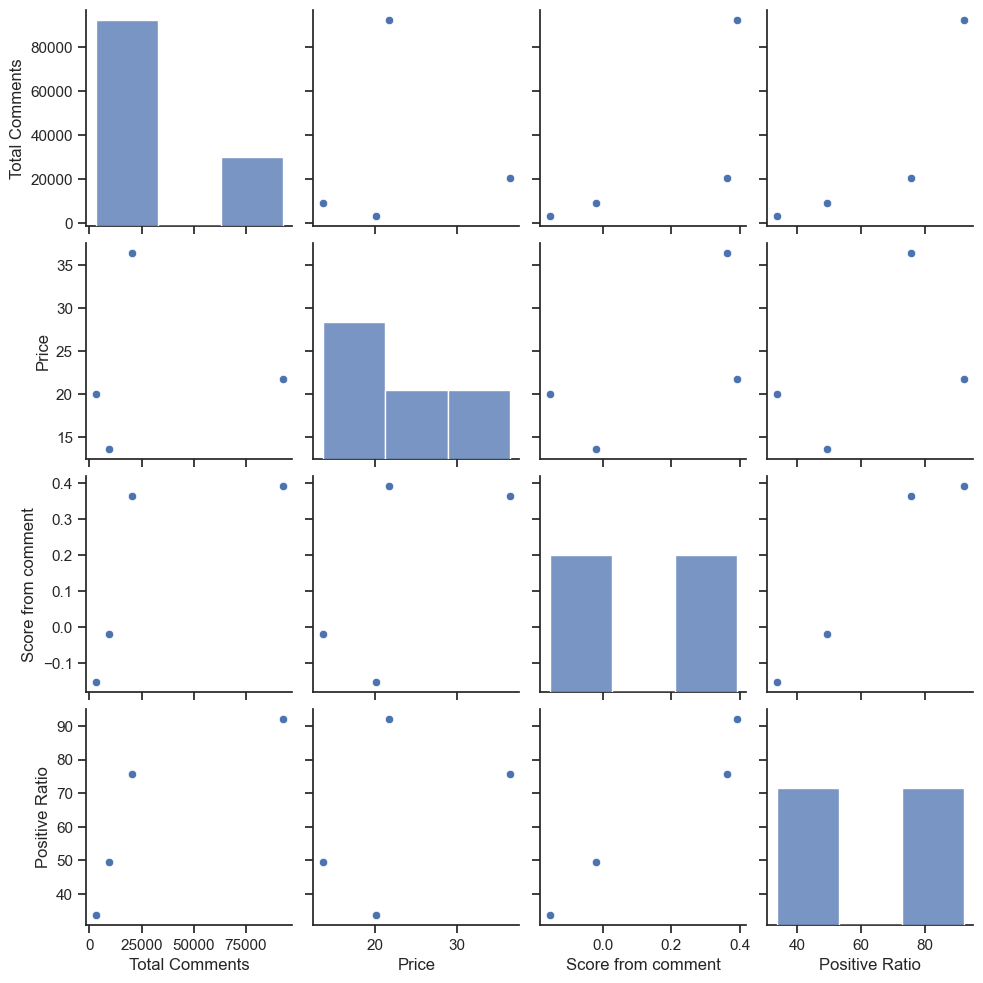

In [59]:
sns.set(style="ticks")
sns.pairplot(dfMean, palette='viridis')
plt.show()

In [60]:
# As a trend can be seen, lets use polynomial Regression to 
# find out the relationship of the numbers

[[33.57142857]
 [49.41666667]
 [75.62962963]
 [92.15841584]]
MAE: 0.2125099887300479
MSE: 0.06763264732250328
RMSE: 0.2600627757340586
R2: 0.999868667717287


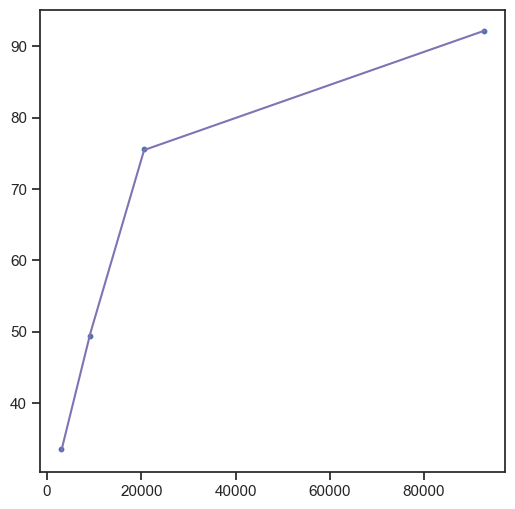

Total comments with positive ratio


In [90]:
# TOtal Comments & Positive ratio
positiveR = np.array(dfMean['Positive Ratio'].tolist())
positiveR = positiveR[:, np.newaxis]
totalC = np.array(dfMean['Total Comments'].tolist())
totalC = totalC[:, np.newaxis]
priceG = np.array(dfMean['Price'].tolist())
priceG = priceG[:, np.newaxis]
scoreC = np.array(dfMean['Score from comment'].tolist())
scoreC = scoreC[:, np.newaxis]

print(positiveR)

train_n_plot(PolynomialFeatures(degree=2), totalC, positiveR)
print("Total comments with positive ratio")

MAE: 15.096942515284548
MSE: 386.21505030151206
RMSE: 19.65235482840446
R2: 0.25002929528485696


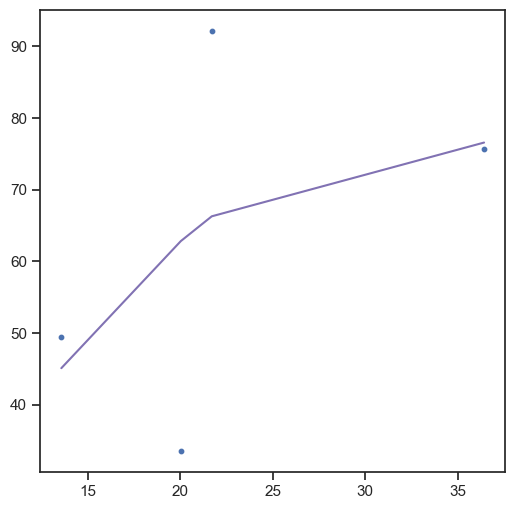

Price with positive ratio


In [91]:
train_n_plot(PolynomialFeatures(degree=2), priceG, positiveR)
print("Price with positive ratio")

MAE: 4.307108600252361
MSE: 25.76579653472328
RMSE: 5.076002022726477
R2: 0.9499667540930686


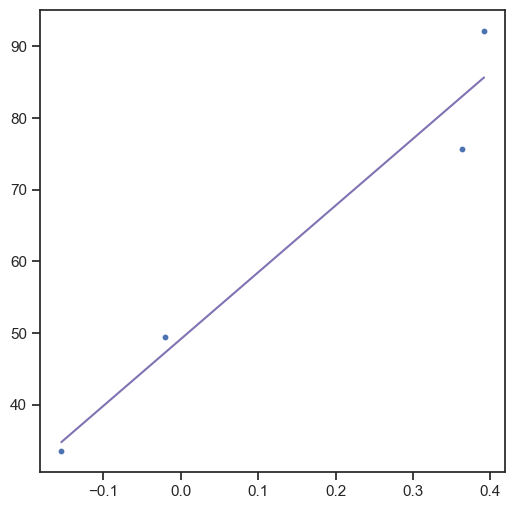

Assumed score with positive ratio


In [92]:
train_n_plot(PolynomialFeatures(degree=1), scoreC, positiveR)
print("Assumed score with positive ratio")

In [64]:
# Other than Price & Positive Ratio, all other regression models showed a good solution
# Therefore, with the R2 of over 0.95 on the total amount of comments and score of comments,
# we can conclude that there is a positive correlation between these two and the positive ratio